In [15]:
import pandas as pd
pd.options.mode.chained_assignment = None
import re 
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
#import datetime as dt

In [2]:
df = pd.read_csv('incident_data.csv')

## THIS IS CURRENTLY JUST THE CLEANING TESTING STUFF< CONVERT TO A PY FILE THAT CLEANS THE DATA, 
## (reads it in and spits out incident_data_cleaned.csv)

In [3]:
# typing, converting date to dt obj
df["date"] = pd.to_datetime(df["date"])

In [4]:
# Making type of officer that released report into a new column
def officer_type(officername):
    officer_prefixes = ["PIO", "Sgt.", "Lt.", "Capt.", "P.O."]
    split_name = officername.split(" ")
    prefix = split_name[0]
    if prefix in officer_prefixes:
        officer_type = prefix
    else:
        officer_type = "Unspecified"
    return officer_type

df["officer_type"] = df["officer"].apply(officer_type)
df["officer_type"] = df["officer_type"].str.replace("PIO", "Public Information Officer")
df["officer_type"] = df["officer_type"].str.replace("P.O.", "Police Officer")
df["officer_type"] = df["officer_type"].str.replace("Sgt.", "Sergeant")
df["officer_type"] = df["officer_type"].str.replace("Lt.", "Lieutenant")
df["officer_type"] = df["officer_type"].str.replace("Capt.", "Captain")

df["officer_type"].unique()

C:\Users\shane\AppData\Local\Temp\ipykernel_82764\3740180151.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df["officer_type"] = df["officer_type"].str.replace("P.O.", "Police Officer")
C:\Users\shane\AppData\Local\Temp\ipykernel_82764\3740180151.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df["officer_type"] = df["officer_type"].str.replace("Sgt.", "Sergeant")
C:\Users\shane\AppData\Local\Temp\ipykernel_82764\3740180151.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df["officer_type"] = df["officer_type"].str.replace("Lt.", "Lieutenant")
C:\Users\shane\AppData\Local\Temp\ipykernel_82764\3740180151.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df["officer_type"] = df["officer_type"].str.replace("Capt.", "Captain")


array(['Police Officer', 'Unspecified', 'Sergeant', 'Lieutenant',
       'Public Information Officer', 'Captain'], dtype=object)

In [5]:
# Parse Release Time from Description, remove last line with officer info

## SHOULD COMBINE THESE INTO FORMAT DESCRIPTION FUNCTION< REMOVE ALL BACKSLASHES



def parse_release(description):
    time_and_officer = description.split("Released ")[-1].split("at ")[-1]
    release_time = time_and_officer.split(" by")[0]
    return release_time
    
    
    
df["release_time"] = df["description"].apply(parse_release)


def remove_infoline(description):
    description = ' '.join(description.split("\n\n")[:-1])
    return description

df["description"] = df["description"].apply(remove_infoline)

df["description"]

0       On Sunday afternoon, Madison Police officers r...
1       Recently, there has been an uptick in scams ta...
2       Yesterday afternoon at approximately 2:00 p.m....
3       As part of the Madison Police Department's com...
4       Missing is a Theodore (TJ) Weege. TJ is a whit...
                              ...                        
2133    Two suspects were seen on surveillance video a...
2134    The MPD is looking to identify a man who spoke...
2135    On 11/26/19 at approximately 4:30pm, the 58 yo...
2136    At approximately 3:09PM a vehicle was stolen i...
2137     A downtown burglary and theft suspect was ide...
Name: description, Length: 2138, dtype: object

In [6]:
df["description"][1]

'Recently, there has been an uptick in scams targeting elderly victims. This increasing trend has been seen in our community and others, and has many different forms. These scams take many forms, but are typically seen when the intended victim receives a call from someone pretending to be their grandchild or a loved one. The "grandchild," in reality is the scammer, and often times will sound panicked and will be asking for help. The scammer will claim that they\'ve been in a car accident, have been arrested, or were the victim of some kind of crime. The scammer will then ask for money, usually with a demand that the victim deliver this immediately and not talk to anyone about the situation. We have seen situations lately where the scammers will ask for cash, and send a "courier," to collect the cash. Other circumstances will ask for bank or credit card information. MPD has also dealt with circumstances where the scammer asks for the victim to go to a Bitcoin ATM and complete a transact

In [7]:
# Remove NaN values
df["updated"]

0              NaN
1              NaN
2              NaN
3              NaN
4       11/07/2022
           ...    
2133           NaN
2134           NaN
2135    12/02/2019
2136           NaN
2137           NaN
Name: updated, Length: 2138, dtype: object

In [8]:
# Apply length to description
df["len_desc"] = df["description"].apply(len)
df.head()

,date,incident,address,officer,casenumber,updated,link,description,officer_type,release_time,len_desc
0,2022-11-14,Damaged Property,400 block S. Midvale Blvd.,P.O. Hunter Lisko,2022-464356,NaN,https://www.cityofmadison.com/police/newsroom/...,"On Sunday afternoon, Madison Police officers r...",Police Officer,10:32 AM,727
1,2022-11-09,Fraud,211 S. Carroll St.,P.O. Hunter Lisko,2022-000000,NaN,https://www.cityofmadison.com/police/newsroom/...,"Recently, there has been an uptick in scams ta...",Police Officer,2:12 PM,2493
2,2022-11-09,Traffic Incident,Beltline/S. Midvale Blvd.,P.O. Hunter Lisko,2022-457354,NaN,https://www.cityofmadison.com/police/newsroom/...,Yesterday afternoon at approximately 2:00 p.m....,Police Officer,8:55 AM,1153
3,2022-11-08,Traffic Incident,900 block E. Washington Ave.,P.O. Hunter Lisko,2022-277138,NaN,https://www.cityofmadison.com/police/newsroom/...,As part of the Madison Police Department's com...,Police Officer,2:03 PM,894
4,2022-11-03,Missing Adult,West Side,Livia Novitzke,2022-446354,11/07/2022,https://www.cityofmadison.com/police/newsroom/...,Missing is a Theodore (TJ) Weege. TJ is a whit...,Unspecified,8:21 PM,226


In [9]:
# TO DO:
# What to do with NaN in updated?
# Pull stuff from description ( parse? length)
# Most common keywords in description?
# Build function to lengthen name of PO/ make it a new column


# TYPING
# 	Hour of Day would be cool
# 	Geocoding
# 	Analysis of Decription,
# 	Description length
# 	Remove Information? Maybe (for plots and desc)
# 	Feature Engineering
# 	Df[“violent”] 0 or 1 based on incident type
# Df[“length_desc”]
# typ e all of the data, datetimes, 
# Possibly make Columns of value_counts of type, neighborhood,



# Possibly parse out the street? 
# Find KMLS or shapefiles for addresses


In [10]:
df["address"] = df["address"].str.replace(" block ", " ")
df["address"] = df["address"].str.replace(" Block ", " ")
df["address"] = df["address"].str.replace("of", "")
df["address"] = df["address"].str.replace(" blk ", " ")

# Replace, use google geocoding

#df["address"] = df["address"].str.split("/")
#df["address"] = df["address"].apply(lambda x: x[0])

#df["address"] = df["address"].str.replace(" at ", " and ") 



# parentheses

df["address"] = df["address"] + ":Madison, WI"


In [14]:
#df["address"]
addr_test = df.iloc[:50]

addr_results = gpd.tools.geocode(addr_test["address"], provider="nominatim",user_agent="snkennedy2@wisc.edu")

addr_results["geometry"]

addr_test["coords"] = addr_results["geometry"]






C:\Users\shane\AppData\Local\Temp\ipykernel_82764\637873095.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  addr_test["coords"] = addr_results["geometry"]


,date,incident,address,officer,casenumber,updated,link,description,officer_type,release_time,len_desc,coords
0,2022-11-14,Damaged Property,"400 S. Midvale Blvd.:Madison, WI",P.O. Hunter Lisko,2022-464356,NaN,https://www.cityofmadison.com/police/newsroom/...,"On Sunday afternoon, Madison Police officers r...",Police Officer,10:32 AM,727,POINT (-89.45124 43.06070)
1,2022-11-09,Fraud,"211 S. Carroll St.:Madison, WI",P.O. Hunter Lisko,2022-000000,NaN,https://www.cityofmadison.com/police/newsroom/...,"Recently, there has been an uptick in scams ta...",Police Officer,2:12 PM,2493,POINT (-89.38269 43.07220)
2,2022-11-09,Traffic Incident,"Beltline:Madison, WI",P.O. Hunter Lisko,2022-457354,NaN,https://www.cityofmadison.com/police/newsroom/...,Yesterday afternoon at approximately 2:00 p.m....,Police Officer,8:55 AM,1153,POINT (-89.38923 43.03745)
3,2022-11-08,Traffic Incident,"900 E. Washington Ave.:Madison, WI",P.O. Hunter Lisko,2022-277138,NaN,https://www.cityofmadison.com/police/newsroom/...,As part of the Madison Police Department's com...,Police Officer,2:03 PM,894,POINT (-89.34429 43.10328)
4,2022-11-03,Missing Adult,"West Side:Madison, WI",Livia Novitzke,2022-446354,11/07/2022,https://www.cityofmadison.com/police/newsroom/...,Missing is a Theodore (TJ) Weege. TJ is a whit...,Unspecified,8:21 PM,226,POINT (-89.36990 43.13792)
5,2022-11-07,Robbery,"4217 W. Beltline Hwy:Madison, WI",P.O. Hunter Lisko,2022-453702,NaN,https://www.cityofmadison.com/police/newsroom/...,"On Sunday evening just before 9:00 p.m., offic...",Police Officer,9:53 AM,1198,POINT (-89.38923 43.03745)
6,2022-08-13,Weapons Violation,"900 Mayfair Ave:Madison, WI",Sgt. Christopher Keys,2022-325687,11/07/2022,https://www.cityofmadison.com/police/newsroom/...,On 8/12/2022 at 11:24 PM Madison Police office...,Sergeant,2:49 AM,166,POINT (-89.32570 43.11073)
7,2022-06-12,Murder/Homicide,"5600 Black Onyx Dr.:Madison, WI",Lt. Paul Bauman,2022-225347,11/07/2022,https://www.cityofmadison.com/police/newsroom/...,"On Sunday, June 12, 2022, at approximately 5:3...",Lieutenant,12:12 PM,646,POINT (-89.27981 43.15447)
8,2022-11-07,Robbery,"7810 Mineral Point Rd.:Madison, WI",P.O. Hunter Lisko,2022-436360,NaN,https://www.cityofmadison.com/police/newsroom/...,The Madison Police Department attempting to id...,Police Officer,8:38 AM,816,POINT (-89.51768 43.06045)
9,2022-11-03,Traffic Incident,"Hwy. 12 corner Broadway:Madison, WI",P.O. Hunter Lisko,2022-450157,11/03/2022,https://www.cityofmadison.com/police/newsroom/...,The Madison Police Department and partnering l...,Police Officer,1:10 PM,783,POINT EMPTY


C:\Users\shane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot: >

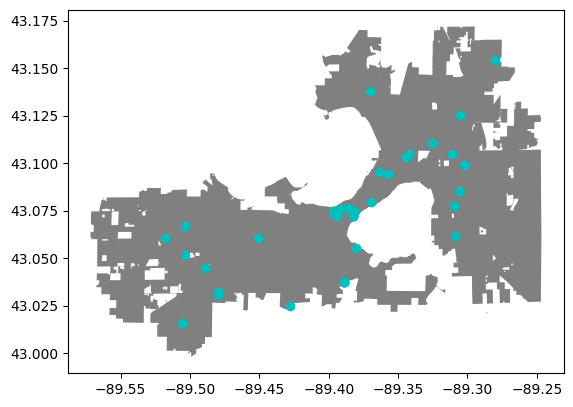

In [39]:
# addr_test["coords"] = addr_results["geometry"]
# addr_test
#sum(addr_results["address"].isna()) #9 

plotting = addr_test[addr_test["coords"].notna()]

geoplot = gpd.GeoDataFrame(plotting)
geoplot = geoplot.set_geometry("coords")

#plotting.plot()

madison_shape = gpd.read_file("City_Limit.shp")

ax = madison_shape.plot(color="grey")
geoplot.plot(column = "coords", ax=ax, color="c")

In [13]:
#addr_test.iloc[21]


## REASONS FOR EMPTY POINTS
#   and, combining 2 streets
#   parentheses (place name)
#   ampersand combining two streets



date                                          2022-10-27 00:00:00
incident                                         Traffic Incident
address              John Nolen Dr. & North Shore Dr.:Madison, WI
officer                                           Lt. Paul Bauman
casenumber                                            2022-439426
updated                                                10/27/2022
link            https://www.cityofmadison.com/police/newsroom/...
description     On Thursday, October 27, 2022, at approximatel...
officer_type                                           Lieutenant
release_time                                              9:05 AM
len_desc                                                      536
Name: 21, dtype: object